# <center> Saving test area as array </center>

## Importing libraries 

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
from osgeo import gdal_array
import math
import geopandas as gpd
from myfunctions import geoCoord2PixelPosition2

print("Libraries successfully imported!")

Libraries successfully imported!


## Loading raster metrics

In [2]:
raster_gdal = gdal.Open("../layers/Aerial RGB image/rgb_image.tif")
rasterArray = raster_gdal.ReadAsArray()
rasterArray_reshaped = rasterArray.transpose(1,2,0)

In [3]:
ulx, xres, xskew, uly, yskew, yres  = raster_gdal.GetGeoTransform()
lrx = ulx + (raster_gdal.RasterXSize * xres)
lry = uly + (raster_gdal.RasterYSize * yres)

## Loading test set

In [4]:
test = gpd.read_file("../layers/Groundtruth shp corrected/test2.shp")

test_3857 = test.to_crs('epsg:3857')

xpix_max, ypix_min = geoCoord2PixelPosition2(test_3857.geometry.x.max(), test_3857.geometry.y.max(), ulx, uly, xres, yres)

## Loading raster and saving as 2 arrays 

In [5]:
raster_path = "../layers/Aerial RGB image/rgb_image.tif"

rgb_array = gdal_array.LoadFile(raster_path)

rgb_transpose = rgb_array.transpose(1,2,0)
rgb_train = rgb_transpose[:(ypix_min-1),:,:]
rgb_test = rgb_transpose[ypix_min:,:,:]

np.save('../tables/rgb_train.npy', rgb_train)
np.save('../tables/rgb_test.npy', rgb_test)

## Plotting the train RGB

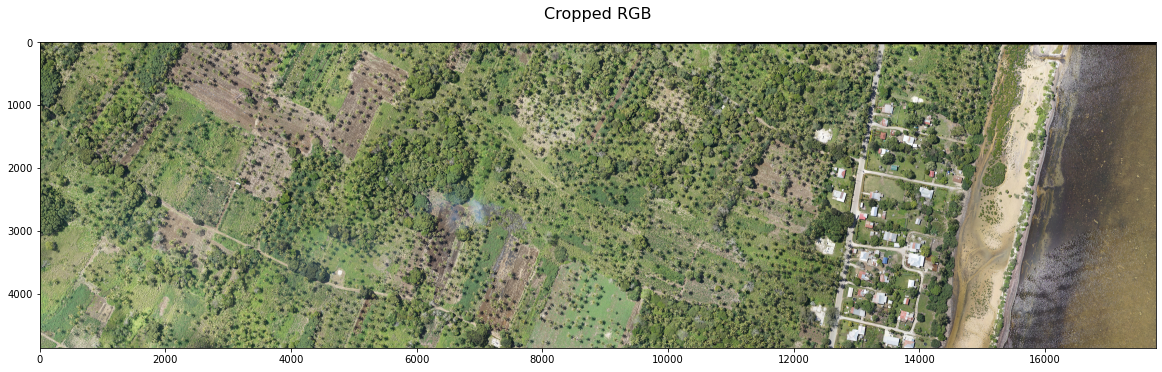

In [6]:
rgb_plot = np.load('../tables/rgb_train.npy')

plt.figure(figsize=(20,20))
plt.imshow(rgb_plot[:,:,:])
plt.title('Cropped RGB\n', fontsize=16)
plt.show()

## Plotting the test RGB

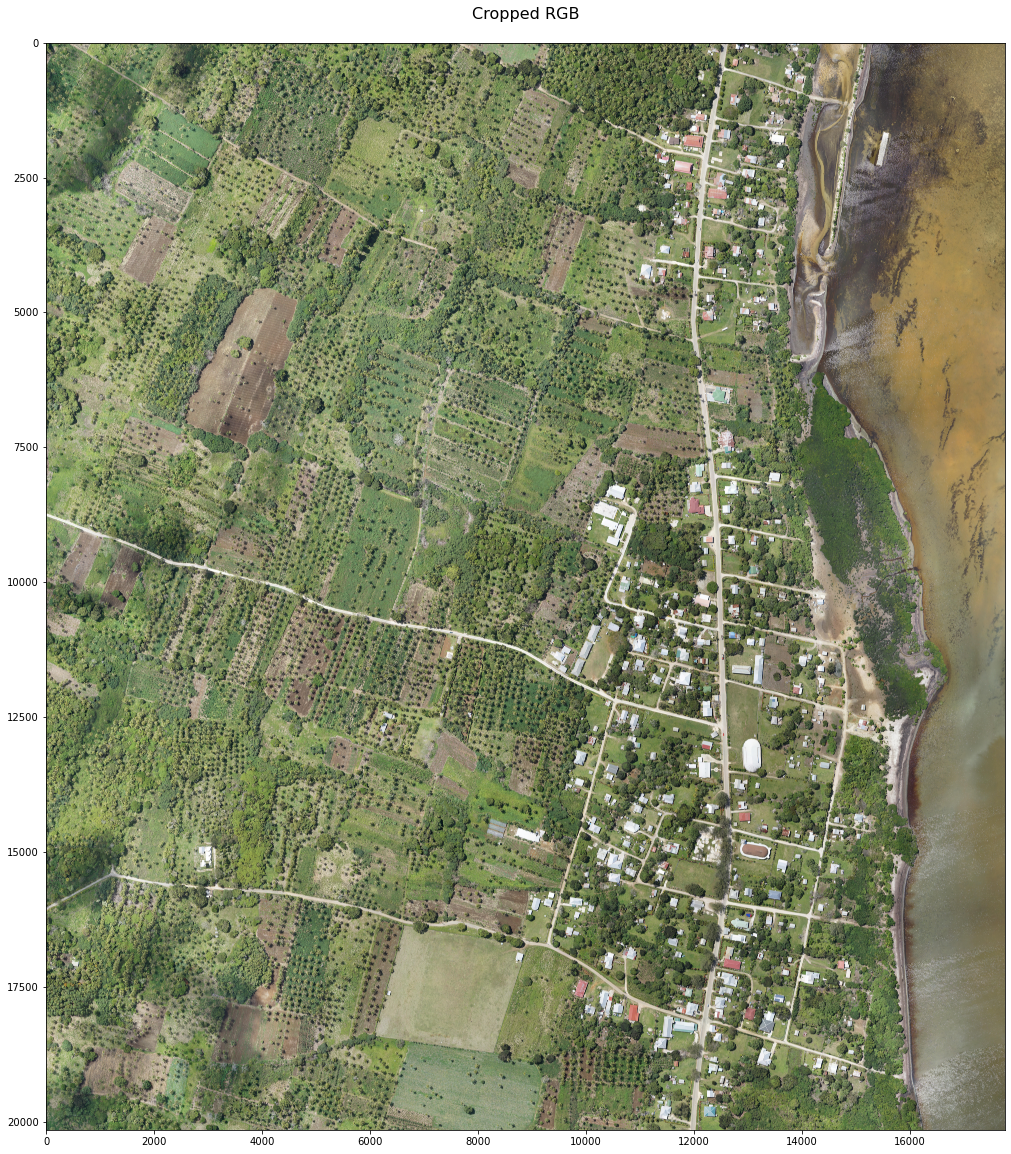

In [7]:
rgb_plot = np.load('../tables/rgb_test.npy')

plt.figure(figsize=(20,20))
plt.imshow(rgb_plot[:,:,:])
plt.title('Cropped RGB\n', fontsize=16)
plt.show()

In [8]:
print('End of the notebook!')

End of the notebook!
